<a href="https://colab.research.google.com/github/econtse1/hello-world/blob/master/Technical_analysis_backtesting_v2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical_analysis_back_testing_Email_alerting_v10

In this notebook we are going to perform the technical analysis and the back testing of different strategies.

We will also demonstrate the use of email alerting on the triggering of trading strategies.

Need to have the following packages:

-TAlib

-yfinance

-mpl_finance

-Pandas

-Numpy

-Matplotlib 

-smtplib

import sys
!{sys.executable} -m pip install "D:\TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl"

import sys
!{sys.executable} -m pip install yfinance --upgrade --no-cache-dir

import sys
!{sys.executable} -m pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

In [18]:
import sys 
!{sys.executable} -m pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     / 491kB 2.8MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.0-cp36-none-any.whl size=5509 sha256=7863cb9ac1a8a94ecedb1afa8c569d980be2ad9808981054b26e664345ecec9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-vqwpaqcz/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [0]:
import sys
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
!{sys.executable} -m pip install yfinance
import yfinance as yf

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib


In [0]:
import sys
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!,/configure --prefix=/usr
!make
!make install
!pip install ta-lib
import talib

In [0]:
pip install yfinance


In [0]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf 
import talib as TA

In [0]:
L1="^HSI"

In [0]:
def ohlc_gen(stock_code,from1):
    import yfinance as yf
    import talib as TA
    import matplotlib.dates as mdates
    L=[]
    #Fetch daily stock data 
    data = yf.download(stock_code,from1)
    data["Date"]=data.index
    data["Week"]=data["Date"].dt.week
    #Create weekly data from daily data
    data_weekly=data[data.index>=from1].groupby(["Week"]).agg(
        {'Open':'first', 'High':'max', 'Low':'min', 'Close':'last','Volume':'sum'})
    #Add TA in daily and weekly data
    data_weekly["Week"]=data_weekly.index
    data["EMA9"]=TA.EMA(data["Close"],9)
    data["EMA19"]=TA.EMA(data["Close"],19)
    data["EMA50"]=TA.EMA(data["Close"],50)
    data["RSI9"]=TA.RSI(data["Close"],9)
    data["macd"], data["macdsignal"], data["macdhist"] = TA.MACD(data["Close"], 
                                                           fastperiod=12, 
                                                           slowperiod=26, signalperiod=9)
       
    data_weekly["EMA9"]=TA.EMA(data_weekly["Close"],9)
    data_weekly["EMA19"]=TA.EMA(data_weekly["Close"],19)
    data_weekly["EMA50"]=TA.EMA(data_weekly["Close"],50)
    #Construct filtered daily and weekly data for chart generation
    ohlc= data[data.index>=from1][['Date', 'Open', 'High', 'Low',
                                   'Close','EMA9','EMA19','EMA50',"RSI9","macd","macdsignal",
                                   "macdhist",'Volume']].copy()
    ohlc["Date"] = ohlc["Date"].apply(mdates.date2num)
    ohlc_weekly= data_weekly[['Week', 'Open', 'High', 'Low',
                              'Close','EMA9','EMA19','EMA50','Volume']].copy()
    
    L.append(data)
    L.append(ohlc)
    L.append(ohlc_weekly)
    return(L)

In [11]:
L=ohlc_gen("^HSI",from1="2018-01-01")

[*********************100%***********************]  1 of 1 downloaded


In [0]:
L[0]

In [0]:
def candlestick_gen1(ohlc,df=None,list_buy=None,list_sell=None,path1=None):
    import matplotlib.pyplot as plt
    %matplotlib inline
    from mpl_finance import candlestick_ohlc
    import matplotlib.dates as mdates
    
    fig = plt.figure(figsize = (15,10))

    ax1 = plt.subplot2grid((6,4), (0,0), rowspan=3, colspan=4)
    ax1.plot(ohlc["Date"],ohlc["EMA9"],color="blue",label="EMA9",linewidth=1)
    ax1.plot(ohlc["Date"],ohlc["EMA19"],color="red",label="EMA19",linewidth=1)
    ax1.plot(ohlc["Date"],ohlc["EMA50"],color="brown",label="EMA50",linewidth=1)
    ax1.grid(True)
    candlestick_ohlc(ax1, ohlc.values, width=.4, 
                     colorup='#53c156', colordown='#ff1717')
    
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    ax1.legend(["Daily"])
    
    ax1_RSI = plt.subplot2grid((6,4), (3,0), sharex=ax1, rowspan=1, colspan=4)
    #ax1_RSI.axes.yaxis.set_ticklabels(["RSI9"])
    ax1_RSI.grid(True)
    ax1_RSI.set_ylim(0, ohlc["RSI9"].max()+10)
    ax1_RSI.plot(ohlc["Date"].values,ohlc["RSI9"].values,color="red",label="RSI9")
  

    ax1_MACD = plt.subplot2grid((6,4), (4,0), sharex=ax1, rowspan=1, colspan=4)
    
    ax1_MACD.grid(True)
    ax1_MACD.set_ylim(ohlc["macd"].min()-100, ohlc["macd"].max()+100)
    ax1_MACD.plot(ohlc["Date"].values,ohlc["macd"].values,color="red",label="macd")
    ax1_MACD.plot(ohlc["Date"].values,ohlc["macdsignal"].values,color="blue",label="macdsignal")
    ax1_MACD.plot(ohlc["Date"].values,ohlc["macdhist"].values,color="black",label="macdhist")
    
    
    ax1v = plt.subplot2grid((6,4), (5,0), sharex=ax1, rowspan=1, colspan=4)
    ax1v.axes.yaxis.set_ticklabels(["Volume"])
    ax1v.grid(False)
    ax1v.set_ylim(0, ohlc["Volume"].max())
    ax1v.bar(ohlc["Date"].values,ohlc
             ["Volume"].values)
    
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax1_RSI.get_xticklabels(), visible=False)


    plt.subplots_adjust(hspace=0)
    
    ax1.legend(loc="upper left")
    ax1_RSI.legend(loc="upper left")
    ax1_MACD.legend(loc="upper left")
    
    if list_buy is not None:
            if len(list_buy)>0:
                list_buy1=[i for i in list_buy if ((i>=df["Date"][0]) & (i<=df["Date"][-1]))]
                
                for x1 in list_buy1:
                    ax1.axvline(x1,color="blue",linestyle="--")
        
    if list_sell is not None:
            if len(list_sell)>0:
                list_sell1=[i for i in list_sell if ((i>=df["Date"][0]) & (i<=df["Date"][-1]))]
                
                for x1 in list_sell1:
                    ax1.axvline(x1,color="red",linestyle="--")
    
    if path1 is not None:
        plt.savefig(path1)


    plt.show()
    
    

In [14]:
#df=yf.download(L1,'2017-01-01')
OHLC_L=ohlc_gen(L1,"2017-01-01")
OHLC=OHLC_L[1]
data=OHLC_L[0]
    
#candlestick_gen1(OHLC)

[*********************100%***********************]  1 of 1 downloaded


In [0]:
OHLC.head()

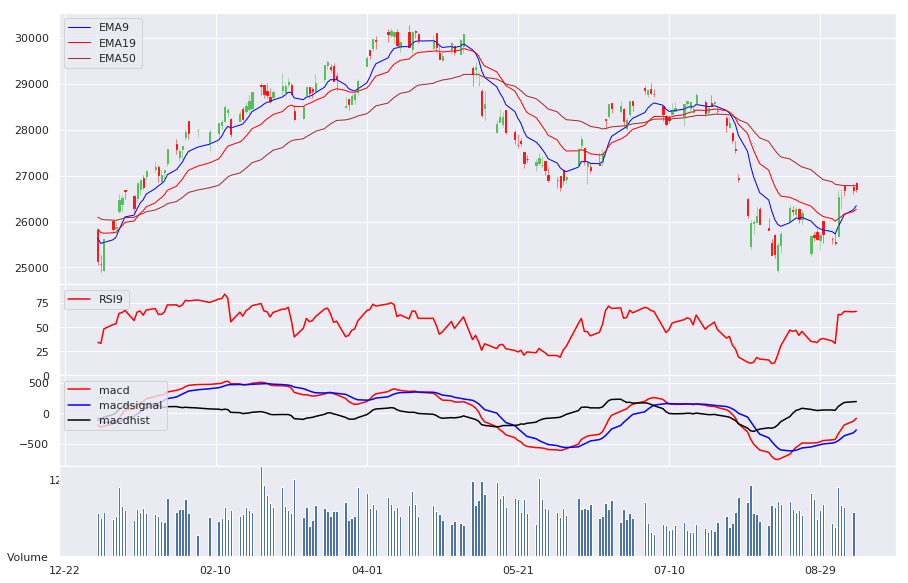

In [19]:
candlestick_gen1(OHLC.loc["2019-01-01":])

In [0]:
data1=data.loc["2018-01-01":].copy()

# Backtesting

In [0]:
def cross_over_up(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])>0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)

In [0]:
def cross_over_down(df,TA1,TA2):
    TA1_TA2=np.where((df[TA1]-df[TA2])<0,1,0)
    Enter1=np.pad(np.where(np.diff(TA1_TA2)==1,1,0),(1,0),"constant")
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)

In [0]:
def EMA_diff_up(df,TA1,TA2,threshold=100):
    Enter1=np.where((df[TA1]-df[TA2])>threshold,1,0)
    Enter=pd.Series(Enter1,index=list(df.index))
    return(Enter)

In [0]:
def strategy(df,enter,exit,long):
    buy_date=[]
    sell_date=[]
    price_buy=[]
    price_sell=[]
    for i in enter.index[enter==1]:
        try:
            date1=df.index[df.index>i][0]
        except:
            next
        
        if date1 is not None:
            try:
                test=exit[exit==1]
                test1=test[test.index>=date1].index[0]
                test2=df.index[df.index>test1][0]
            except:
                test2=None
        else:
            test2=None
        buy_date.append(date1)
        sell_date.append(test2)
        
    for i in buy_date:
        if i is not None:
            price=df.loc[i]["Open"]
            price_buy.append(price)
        else:
            price_buy.append(None)
        
    
    for i in sell_date:
        if i is not None:
            price=df.loc[i]["Open"]
            price_sell.append(price)
        else:
            price_sell.append(None)
        
    d1=pd.DataFrame({"Date_Buy":buy_date,
                    "Date_Sell":sell_date,
                    "Price_Buy":price_buy,
                    "Price_Sell":price_sell})   
    if long==1:
        d1["Gain"]=d1["Price_Sell"]-d1["Price_Buy"]
        d1["Return"]=100*(d1["Price_Sell"]-d1["Price_Buy"])/d1["Price_Buy"]
        d1["Position"]="long"
    else:
        d1["Gain"]=d1["Price_Buy"]-d1["Price_Sell"]
        d1["Return"]=100*(d1["Price_Buy"]-d1["Price_Sell"])/d1["Price_Buy"]
        d1["Position"]="short"
    d1.index=d1["Date_Buy"]
    return(d1)

## EMA cross over strategy

Long:

Enter: when EMA9 cross over up EMA19

Exit: when EMA9 cross over down EMA19

Short:

Enter: when EMA9 cross over down EMA19

Exit: when EMA9 cross over up EMA19

In [0]:
enter=cross_over_up(data1,"EMA9","EMA19")
exit=cross_over_down(data1,"EMA9","EMA19")

In [26]:
enter

2018-01-02    0
2018-01-03    0
2018-01-04    0
2018-01-05    0
2018-01-08    0
2018-01-09    0
2018-01-10    0
2018-01-11    0
2018-01-12    0
2018-01-15    0
2018-01-16    0
2018-01-17    0
2018-01-18    0
2018-01-19    0
2018-01-22    0
2018-01-23    0
2018-01-24    0
2018-01-25    0
2018-01-26    0
2018-01-29    0
2018-01-30    0
2018-01-31    0
2018-02-01    0
2018-02-02    0
2018-02-05    0
2018-02-06    0
2018-02-07    0
2018-02-08    0
2018-02-09    0
2018-02-12    0
             ..
2019-07-31    0
2019-08-01    0
2019-08-02    0
2019-08-05    0
2019-08-06    0
2019-08-07    0
2019-08-08    0
2019-08-09    0
2019-08-12    0
2019-08-13    0
2019-08-14    0
2019-08-15    0
2019-08-16    0
2019-08-19    0
2019-08-20    0
2019-08-21    0
2019-08-22    0
2019-08-23    0
2019-08-26    0
2019-08-27    0
2019-08-28    0
2019-08-29    0
2019-08-30    0
2019-09-02    0
2019-09-03    0
2019-09-04    0
2019-09-05    0
2019-09-06    0
2019-09-09    1
2019-09-10    0
Length: 416, dtype: int6

In [0]:
enter[enter==1].index.astype(str).tolist()

In [0]:
exit[exit==1].index.astype(str).tolist()

In [0]:
df=strategy(data1,enter,exit,1)
df


In [0]:
buy_list=df.index.tolist()

In [0]:
df1=strategy(data1,exit,enter,0)
df1

In [0]:
sell_list=df1.index.tolist()

In [0]:
df_sum=pd.concat([df,df1],axis=0)
df_sum=df_sum.sort_index(ascending=True)


In [34]:
df_sum

,Date_Buy,Date_Sell,Price_Buy,Price_Sell,Gain,Return,Position
Date_Buy,,,,,,,
2018-02-08,2018-02-08,2018-03-14,30555.80,31321.79,-765.99,-2.506856,short
2018-03-14,2018-03-14,2018-03-26,31321.79,30267.07,-1054.72,-3.367368,long
2018-03-26,2018-03-26,2018-05-11,30267.07,31151.80,-884.73,-2.923078,short
2018-05-11,2018-05-11,2018-05-31,31151.80,30274.18,-877.62,-2.817237,long
2018-05-31,2018-05-31,2018-06-06,30274.18,31162.02,-887.84,-2.932664,short
2018-06-06,2018-06-06,2018-06-19,31162.02,29999.01,-1163.01,-3.732139,long
2018-06-19,2018-06-19,2018-08-30,29999.01,28533.93,1465.08,4.883761,short
2018-08-30,2018-08-30,2018-09-04,28533.93,27619.18,-914.75,-3.205832,long
2018-09-04,2018-09-04,2018-09-27,27619.18,27912.51,-293.33,-1.062052,short


In [0]:
df_sum["Gain"].dropna().cumsum()

In [0]:
df_sum["Gain"].dropna().cumsum().plot(figsize=(15,10))

FileNotFoundError: ignored

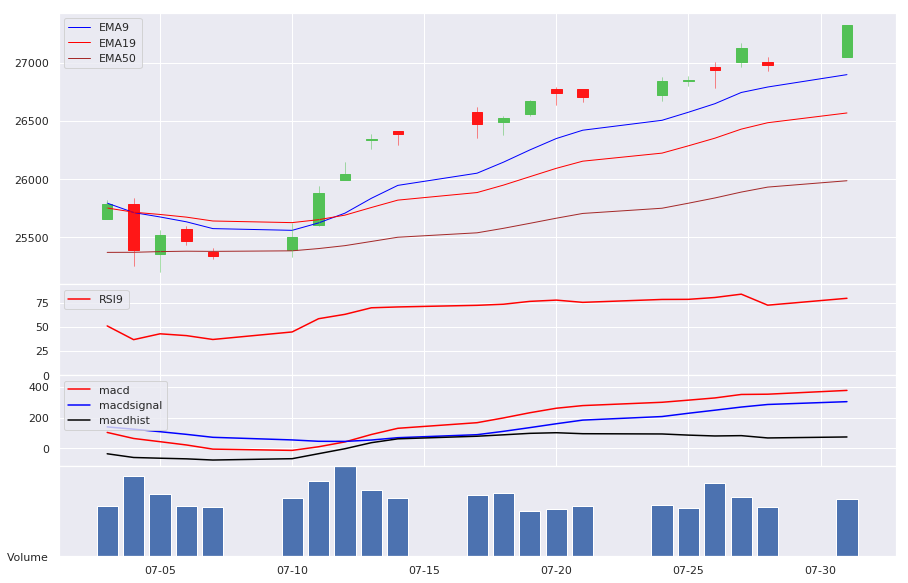

In [37]:
candlestick_gen1(OHLC.loc["2017-07-01":"2017-07-31"],data.loc["2017-07-01":"2017-07-31"],buy_list,sell_list,"C:/fig1.png")

please refer to the following link for details on the use of the TA-Lib please refer to the following link

https://mrjbq7.github.io/ta-lib/doc_index.html

## Another example

Long:

Enter: when T0: EMA9 cross over up EMA19 and T+2: EMA9-EMA19>=N(e.g. 100)

Exit: when EMA9 cross over down EMA19 or stop_loss(?)

Short:

Enter: when T0: EMA9 cross over down EMA19 T+2:EMA19-EMA9>=N(e.g. 100)

Exit: when EMA9 cross over up EMA19 or stop_loss(?)
    


### To count the number of enter in long position

In [0]:
enter=cross_over_up(data1,"EMA9","EMA19")

In [0]:
enter=enter.shift(2).fillna(0).astype(int)

In [0]:
enter1=EMA_diff_up(data1,"EMA9","EMA19")

In [0]:
enter2=(enter) & (enter1)

In [0]:
sum(enter2)

5

In [0]:
enter2[enter2==1].index.astype(str).tolist()

['2018-03-15', '2018-05-14', '2018-06-07', '2019-01-14', '2019-06-24']